# Import Libraries

In [1]:
from google.colab import drive
import numpy as np
import pandas as pd
from wordcloud import WordCloud
import nltk
from sklearn.feature_extraction.text import TfidfVectorizer

# Mounting the dataframe from google drive 

In [2]:

drive.mount('gdrive')

Drive already mounted at gdrive; to attempt to forcibly remount, call drive.mount("gdrive", force_remount=True).


In [3]:
trainfile = "gdrive/MyDrive/SIS_Faculty-List.xlsx"
df = pd.read_excel(trainfile)


# Printing columns

In [4]:
df.columns

Index(['ID', 'Name', 'Location', 'Grade', 'Title', 'Join\nDate', 'LWD', 'Type',
       'Divison', 'Reports To', 'Highest\nQualification\nLevel',
       'Highest Qualification', 'Major', 'University',
       'All Qualifications from Profile', 'Courses Taught- Term 201510',
       'MAJOR TEACHING FIELD',
       'DOCUMENT OTHER PROFESSIONAL CERTIFICATION CRITIERA Five Years Work Experience Teaching Excellence Professional Certifications',
       'Criteria'],
      dtype='object')

# Renaming big column names to smaller one

In [5]:
df.rename(columns = {'DOCUMENT OTHER PROFESSIONAL CERTIFICATION CRITIERA Five Years Work Experience Teaching Excellence Professional Certifications':'ProfessionalCertificationsLastFiveYears', 'Join\nDate': 'JoinDate','Highest\nQualification\nLevel':'HighestQualificationLevel'}, inplace=True)

# Printing head of the data frame 

In [6]:
df.head()

,ID,Name,Location,Grade,Title,JoinDate,LWD,Type,Divison,Reports To,HighestQualificationLevel,Highest Qualification,Major,University,All Qualifications from Profile,Courses Taught- Term 201510,MAJOR TEACHING FIELD,ProfessionalCertificationsLastFiveYears,Criteria
0,LT9210743,Jim Hunter,London,FA,Faculty - Business,2010-08-29,NaT,Full Time,Business,Abbas Houda,Masters,Master of Arts,International Affairs,American University of Beirut,"Bachelor of Science (Communications), Master o...",BUS2403 - Innovation & Entrepreneurship\nBUS20...,Business Administration,"10+ Years Small Business Ownership, 10+ Years ...",Industry & Teaching experience
1,LT9001784,Jose Nadal,London,FA,Faculty - Business,1999-08-19,NaT,Full Time,Business,Abbas Houda,Masters,Master of Science,Business Info. Technology,University of Northumbria,"Bachelor of Arts (Finance), Certificate (Manag...",BUS4173 - Managerial Accounting II\nBUS4916 - ...,Business,years of teaching experience: 17 ...,Certification
2,LT9062955,Pierre Cornet,London,FA,Faculty - Business,2007-04-08,NaT,Full Time,Business,Abbas Houda,Masters,Master of Business Administrat,Marketing,Griffith University,"Certificate (Educating/Teaching Adult), Associ...",BUS3903 - Contemporary Business\nBUS1303 - Mar...,Marketing and Strategic Management,Years of teaching experience: 15\nYears of pro...,Industry & Teaching experience
3,0,Sally Smith,London,FA,Faculty - Business,2016-08-14,NaT,Full Time,Business,Abbas Houda,Ph.D,Ph.D in HRM/ Organizational pyschology,HRM/ Organizational Psychology,"The University of Swansea, UK","Bachelor(finance & Mgt), Masters(MBA & Masters...","HRM, Organizational behaviour, Strategic Mgt, ...",HRM,6 years professional experience + 6 years teac...,Researcher
4,0,Ned Shearer,London,Chair,Faculty - Business,2016-08-14,NaT,Full Time,Business,Tony Emmanuel,Ph.D,Ph.D in Economics and International Business,Economics and International Business,"New York University, USA","Bachelor( Economics), Masters( Economics and I...","Micro and Macroeconomics, Statistics,Introduct...",Economics and International Business,1 year professional experience + 24 years teac...,Researcher/Curriculum Development


# Printing tail of the data frame

In [7]:
df.tail()

,ID,Name,Location,Grade,Title,JoinDate,LWD,Type,Divison,Reports To,HighestQualificationLevel,Highest Qualification,Major,University,All Qualifications from Profile,Courses Taught- Term 201510,MAJOR TEACHING FIELD,ProfessionalCertificationsLastFiveYears,Criteria
279,0,Cami Wiegand,Cambridge,FA,Faculty - Business,2016-08-14,NaT,Full Time,Business,Olu Ebenezer,Ph.D,Economics and Business,Economics,"South East European University, Macedonia","Bachelor( Political Science), Masters( Europea...","intro to Economics, EU laws and Regulations, O...","Economics, policy and general business course",9 years professional experience+ 11 years teac...,Researcher
280,0,Alan Sheely,Cambridge,FA,Faculty - Business,2016-08-14,NaT,Full Time,Business,Olu Ebenezer,Ph.D,Management Science,Marketing,"University of Economics, Krakow, Poland","Bachelor( Foreign Languages), Masters( America...","Marketing Management, Marketing Research, Cons...",Marketing,16 years professional( consulting) experience ...,Researcher/Curriculum Development
281,0,Allison Gall,Cambridge,FA,Faculty - Business,2016-08-14,NaT,Full Time,Business,Olu Ebenezer,Ph.D,Ph.D,HRM,"University of Mauritus, Mauritus","Bachelor( Economics), Masters( Industrial Rela...","HRM, SHRM, Performance and Reward Mgt, Researc...",HRM,14 years professional experience + 9 years tea...,Certification/Researcher
282,0,Myles Tena,Cambridge,FA,Faculty - Business,2016-08-14,NaT,Full Time,Business,Olu Ebenezer,Ph.D,Ph.D,Economic Sociology,"University of San Paulo, Brazil","Bachelor(Economics), Masters( Industrial Engin...",Economics and Management,"Financial Mgt, Project Mgt, Entrepreneurial Fi...",12 years professional experience + 11 years te...,Researcher
283,0,Dessie Burruss,Cambridge,FA,Faculty - Business,2016-08-14,NaT,Full Time,Business,Olu Ebenezer,Ph.D,Ph.D in Public Policy and Administration,Management and Financial Mgt,"Virginia Commonwealth University, USA","Bachelor( Civil Engineering), Masters(Civil En...","Leadership, Organizational Design and Behaviou...",Finance and Management,16 years professional experience +11 year teac...,Researcher


## While printing head and tail we understood the ID column is 0 which will not make any sense in analysis.So removing ID

In [8]:
df.pop('ID')

0      LT9210743
1      LT9001784
2      LT9062955
3              0
4              0
         ...    
279            0
280            0
281            0
282            0
283            0
Name: ID, Length: 284, dtype: object

# Printing head after removing ID

In [9]:
df.head()

,Name,Location,Grade,Title,JoinDate,LWD,Type,Divison,Reports To,HighestQualificationLevel,Highest Qualification,Major,University,All Qualifications from Profile,Courses Taught- Term 201510,MAJOR TEACHING FIELD,ProfessionalCertificationsLastFiveYears,Criteria
0,Jim Hunter,London,FA,Faculty - Business,2010-08-29,NaT,Full Time,Business,Abbas Houda,Masters,Master of Arts,International Affairs,American University of Beirut,"Bachelor of Science (Communications), Master o...",BUS2403 - Innovation & Entrepreneurship\nBUS20...,Business Administration,"10+ Years Small Business Ownership, 10+ Years ...",Industry & Teaching experience
1,Jose Nadal,London,FA,Faculty - Business,1999-08-19,NaT,Full Time,Business,Abbas Houda,Masters,Master of Science,Business Info. Technology,University of Northumbria,"Bachelor of Arts (Finance), Certificate (Manag...",BUS4173 - Managerial Accounting II\nBUS4916 - ...,Business,years of teaching experience: 17 ...,Certification
2,Pierre Cornet,London,FA,Faculty - Business,2007-04-08,NaT,Full Time,Business,Abbas Houda,Masters,Master of Business Administrat,Marketing,Griffith University,"Certificate (Educating/Teaching Adult), Associ...",BUS3903 - Contemporary Business\nBUS1303 - Mar...,Marketing and Strategic Management,Years of teaching experience: 15\nYears of pro...,Industry & Teaching experience
3,Sally Smith,London,FA,Faculty - Business,2016-08-14,NaT,Full Time,Business,Abbas Houda,Ph.D,Ph.D in HRM/ Organizational pyschology,HRM/ Organizational Psychology,"The University of Swansea, UK","Bachelor(finance & Mgt), Masters(MBA & Masters...","HRM, Organizational behaviour, Strategic Mgt, ...",HRM,6 years professional experience + 6 years teac...,Researcher
4,Ned Shearer,London,Chair,Faculty - Business,2016-08-14,NaT,Full Time,Business,Tony Emmanuel,Ph.D,Ph.D in Economics and International Business,Economics and International Business,"New York University, USA","Bachelor( Economics), Masters( Economics and I...","Micro and Macroeconomics, Statistics,Introduct...",Economics and International Business,1 year professional experience + 24 years teac...,Researcher/Curriculum Development


# Identifying columns with null value

In [10]:
df.isna().any()

Name                                       False
Location                                    True
Grade                                      False
Title                                      False
JoinDate                                    True
LWD                                         True
Type                                       False
Divison                                    False
Reports To                                  True
HighestQualificationLevel                   True
Highest Qualification                       True
Major                                       True
University                                  True
All Qualifications from Profile             True
Courses Taught- Term 201510                 True
MAJOR TEACHING FIELD                        True
ProfessionalCertificationsLastFiveYears     True
Criteria                                   False
dtype: bool

In [11]:
df.isna().sum()

Name                                         0
Location                                    14
Grade                                        0
Title                                        0
JoinDate                                     1
LWD                                        273
Type                                         0
Divison                                      0
Reports To                                   4
HighestQualificationLevel                    6
Highest Qualification                        6
Major                                       22
University                                   6
All Qualifications from Profile             10
Courses Taught- Term 201510                 11
MAJOR TEACHING FIELD                        59
ProfessionalCertificationsLastFiveYears     62
Criteria                                     0
dtype: int64

# Checking data types of columns. 

In [12]:
dataTypes = df.dtypes
print('Data type of each column of Dataframe :')
print(dataTypes)

Data type of each column of Dataframe :
Name                                               object
Location                                           object
Grade                                              object
Title                                              object
JoinDate                                   datetime64[ns]
LWD                                        datetime64[ns]
Type                                               object
Divison                                            object
Reports To                                         object
HighestQualificationLevel                          object
Highest Qualification                              object
Major                                              object
University                                         object
All Qualifications from Profile                    object
Courses Taught- Term 201510                        object
MAJOR TEACHING FIELD                               object
ProfessionalCertificationsLastFi

# Checking rows with null columns > 4

In [13]:
under_threshold_removed = df.dropna(axis='index', thresh=4, inplace=False)
under_threshold_rows = df[~df.index.isin(under_threshold_removed.index)]
print(under_threshold_rows)

Empty DataFrame
Columns: [Name, Location, Grade, Title, JoinDate, LWD, Type, Divison, Reports To, HighestQualificationLevel, Highest Qualification, Major, University, All Qualifications from Profile, Courses Taught- Term 201510, MAJOR TEACHING FIELD, ProfessionalCertificationsLastFiveYears, Criteria]
Index: []


# Finding unique values of LWD

In [14]:
print(df.LWD.unique())

[                          'NaT' '2015-12-22T00:00:00.000000000'
 '2015-12-17T00:00:00.000000000']


In [15]:
df.fillna(value={'LWD': 'NaT'}, inplace=True)

In [16]:
df.isna().sum()

Name                                        0
Location                                   14
Grade                                       0
Title                                       0
JoinDate                                    1
LWD                                         0
Type                                        0
Divison                                     0
Reports To                                  4
HighestQualificationLevel                   6
Highest Qualification                       6
Major                                      22
University                                  6
All Qualifications from Profile            10
Courses Taught- Term 201510                11
MAJOR TEACHING FIELD                       59
ProfessionalCertificationsLastFiveYears    62
Criteria                                    0
dtype: int64

# Improving readability for Grade column

In [17]:
print(df.Grade.unique())

['FA' 'Chair']


In [18]:
df["Grade"].replace({"FA": "Faculty", "Chair": "Chairman"}, inplace=True)
print(df['Grade'].value_counts())

Faculty     282
Chairman      2
Name: Grade, dtype: int64


# Plotting missing values using  missingno

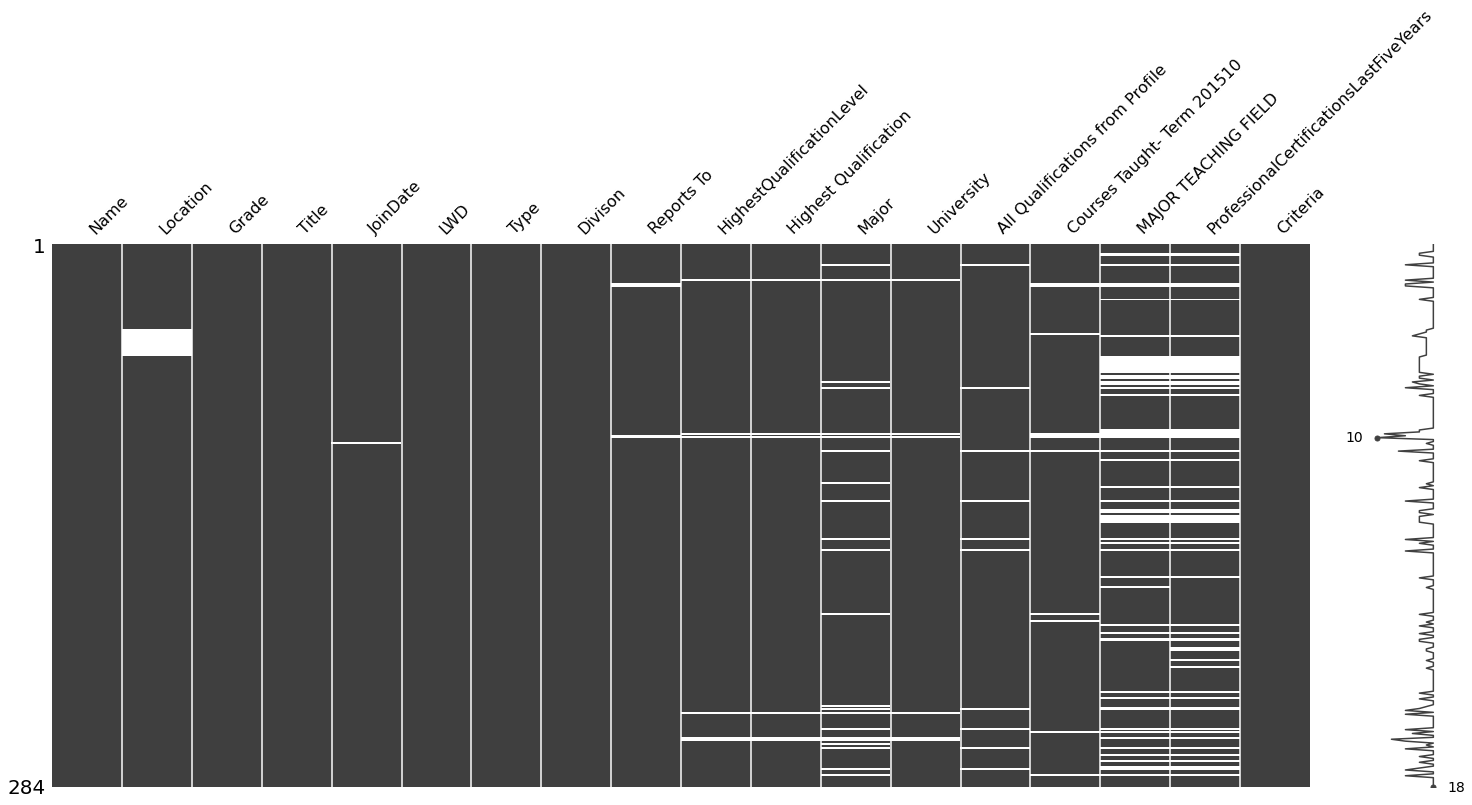

In [19]:
import missingno as msno
%matplotlib inline
msno.matrix(df)

# missingno heat map

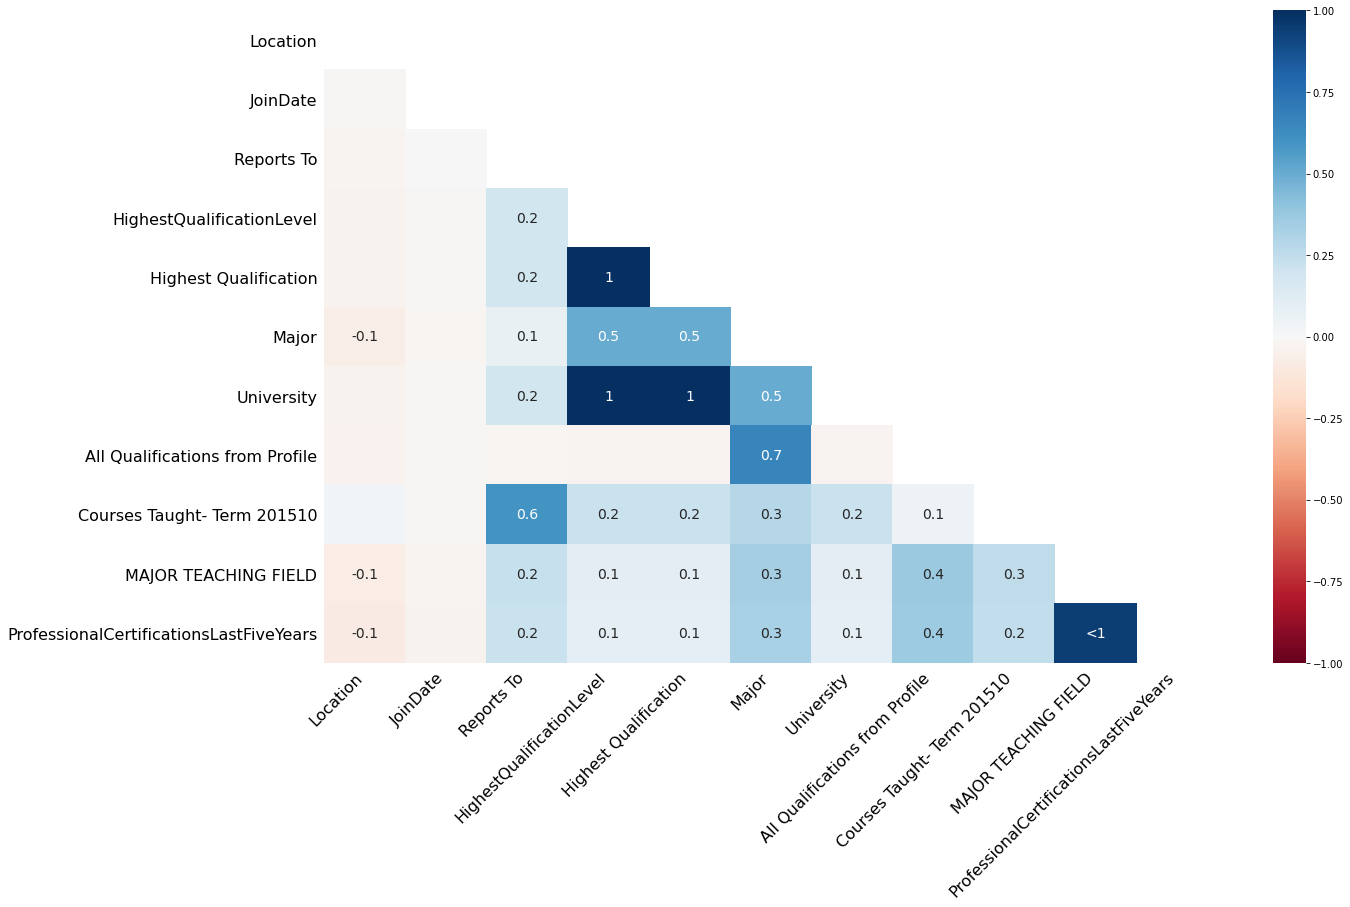

In [20]:
msno.heatmap(df)

# missingno bar

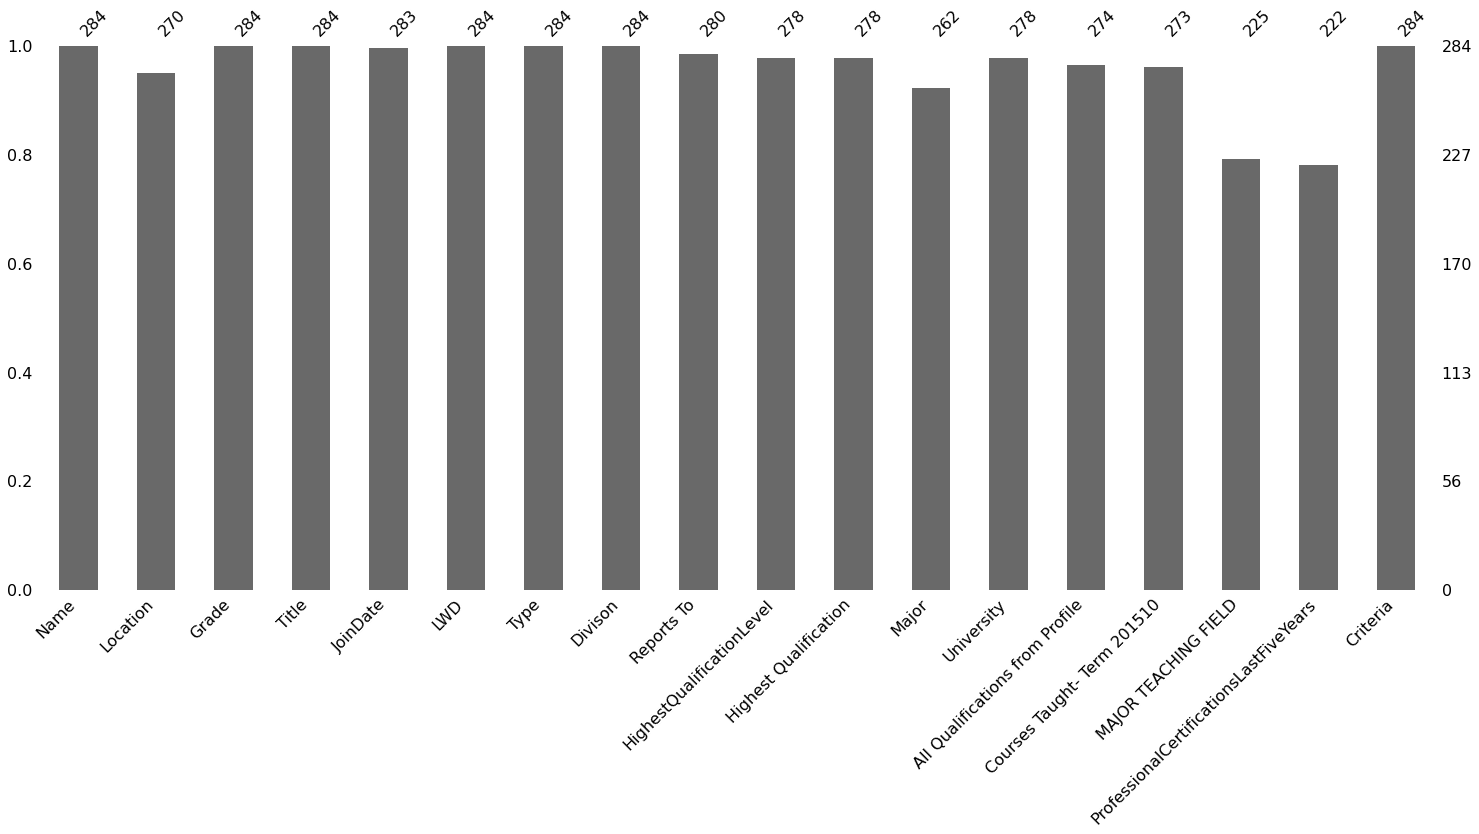

In [21]:
msno.bar(df)

# Pie chart of Title column

In [22]:
from collections import Counter
print(Counter(df['Title']))

Counter({'Faculty - Business': 252, 'Faculty - Trainee': 13, 'Adjunct Faculty - Business': 9, 'Faculty- Business': 2, 'Faculty - Business (Admin)': 1, 'Faculty-Business (HR & Admin.)': 1, 'Faculty - Business ': 1, 'Faculty - Business & Comp Lit Faculty': 1, 'Faculty-Business': 1, 'Business, Comp & Math Faculty': 1, 'Graduate Trainee': 1, 'Faculty - Business & Comp Lit.': 1})


In [23]:
import matplotlib.ticker as ticker
import matplotlib.cm as cm
import matplotlib as mpl
from matplotlib.gridspec import GridSpec
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import matplotlib.cm as cm
import matplotlib as mpl
from matplotlib.gridspec import GridSpec
import matplotlib.pyplot as plt

title_type = df.groupby('Title').agg('count')
type_labels = title_type.Name.sort_values().index 
type_counts = title_type.Name.sort_values()

In [24]:
type_counts

Title
Business, Comp & Math Faculty              1
Faculty - Business                         1
Faculty - Business & Comp Lit Faculty      1
Faculty - Business & Comp Lit.             1
Faculty - Business (Admin)                 1
Faculty-Business                           1
Faculty-Business (HR & Admin.)             1
Graduate Trainee                           1
Faculty- Business                          2
Adjunct Faculty - Business                 9
Faculty - Trainee                         13
Faculty - Business                       252
Name: Name, dtype: int64

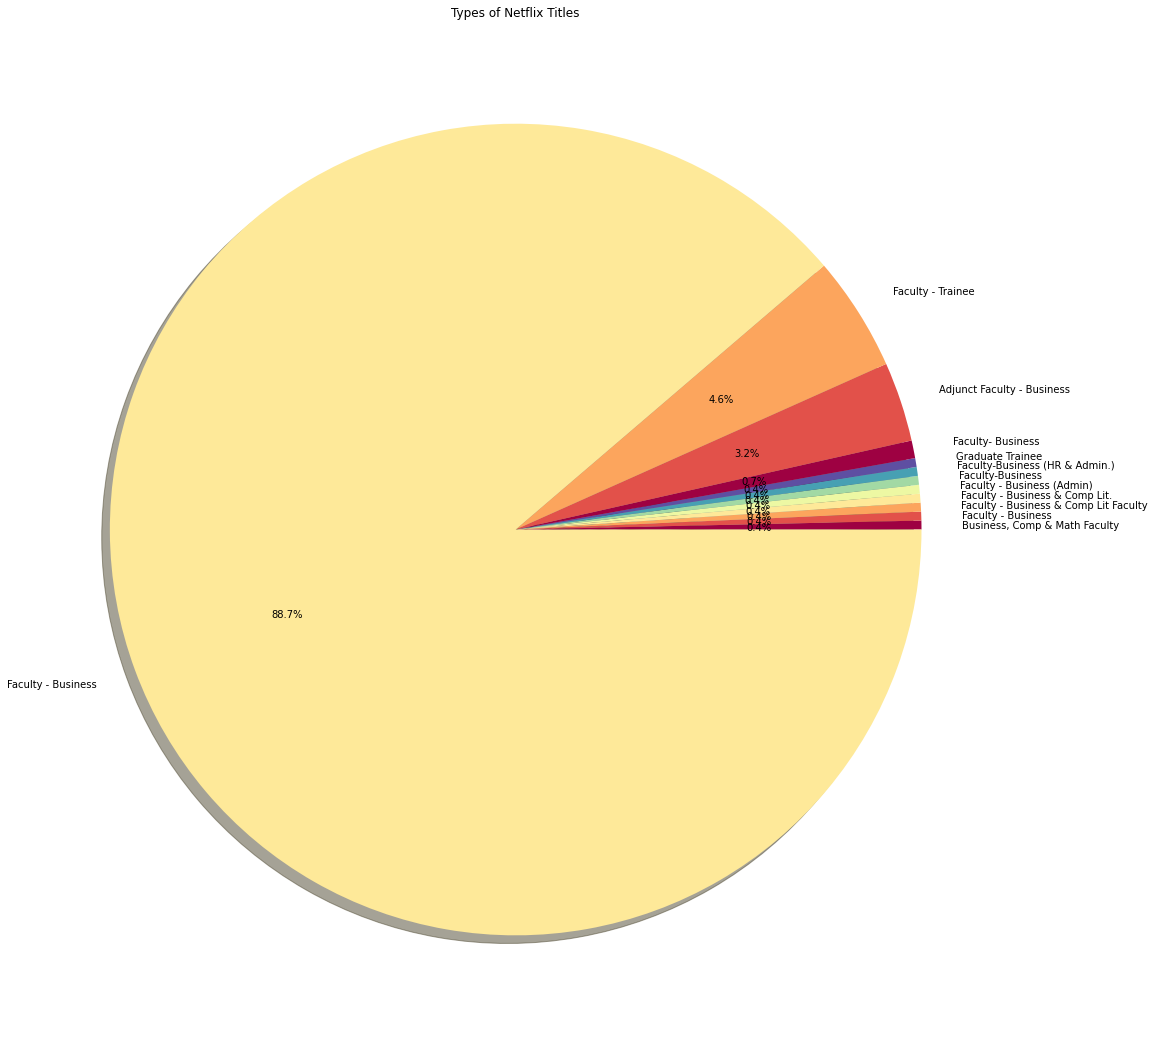

In [25]:
plt.figure(1, figsize=(40,50)) 
the_grid = GridSpec(2, 2)
cmap = plt.get_cmap('Spectral')
colors = [cmap(i) for i in np.linspace(0, 1, 8)]
plt.subplot(the_grid[0, 1], aspect=1, title='Types of Netflix Titles')
type_show_ids = plt.pie(type_counts, labels=type_labels, autopct='%1.1f%%', shadow=True, colors=colors)
plt.show()

# Text Analysis

In [26]:
df.replace(to_replace=[r"\\t|\\n|\\r", "\t|\n|\r"], value=["",""], regex=True, inplace=True)
df = df.fillna('NA')

## Word cloud

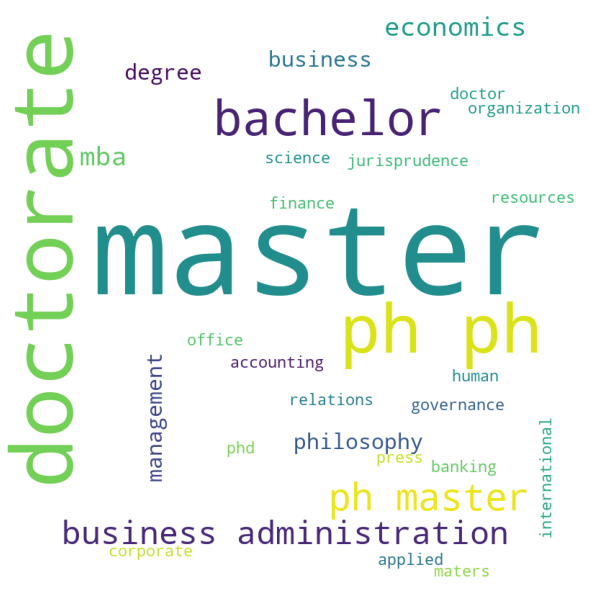

In [27]:
comment_words = ''
stopwords = nltk.corpus.stopwords.words('english')
stopwords.extend(['NA', 'public','nan'])
for val in df.HighestQualificationLevel:

    # typecaste each val to string
    val = str(val)

    # split the value
    tokens = val.split()

    # Converts each token into lowercase
    for i in range(len(tokens)):
        tokens[i] = tokens[i].lower()

    comment_words += " ".join(tokens) + " "

wordcloud = WordCloud(width=800, height=800,
                      background_color='white',
                      stopwords=stopwords,
                      min_font_size=10).generate(comment_words)

# plot the WordCloud image
plt.figure(figsize=(8, 8), facecolor=None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad=0)

plt.show()

## TF-IDF Vectorization

In [28]:
def CreateCorpusFromDataFrame():
    corpus = []
    for val in df.ProfessionalCertificationsLastFiveYears:
       corpus.append(str(val))
    return corpus 

In [29]:
corpus = CreateCorpusFromDataFrame()

In [30]:
v = TfidfVectorizer()
df_tfidf= pd.DataFrame(v.fit_transform(corpus).toarray(), columns=v.get_feature_names())

In [31]:
df_tfidf

,10,10professional,11,11industry,12,12professional,12years,13,13years,14,14years,15,15years,16,17,18,19,1978,1982food,1989holiday,1v,20,2001,2005,2006,2007,2008,2009,2010,2011,2012,2013,21,23,2303_,24,25,27,28,29,...,uae,ugc,uk,undergraduate,understanding,unit,universities,university,uos,us,usa,uyears,v1,various,verifier,vet,virginia,visiting,vocational,vp,webmaster,wharton,with,work,working,workplace,workshop,workshops,writer,writing,year,years,yearsindustry,yearsprof,yearsprofessional,yearsyears,yrs,yrsprofessional,yrsyears,zealand
0,0.53262,0.0,0.000000,0.0,0.00000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.00000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.262522,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.264131,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.00000,0.0,0.000000,0.0,0.00000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.32795,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.204206,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.00000,0.0,0.000000,0.0,0.00000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.649266,0.000000,0.00000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.144316,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.00000,0.0,0.000000,0.0,0.00000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.00000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.379794,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.00000,0.0,0.000000,0.0,0.00000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.00000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.362399,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.305740,0.095188,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
279,0.00000,0.0,0.512895,0.0,0.00000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.00000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.326034,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
280,0.00000,0.0,0.000000,0.0,0.00000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.256515,0.00000,0.0,0.302342,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.175151,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
281,0.00000,0.0,0.000000,0.0,0.00000,0.0,0.0,0.0,0.0,0.204133,0.0,0.0,0.000000,0.000000,0.00000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.141596,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
282,0.00000,0.0,0.459859,0.0,0.44285,0.0,0.0,0.0,0.0,0.000000,

# Exporting processed data to xlsx

In [32]:
file_name = 'SIS_Faculty-List-cleaned.xlsx'
df.to_excel(file_name)
print('DataFrame is written to Excel File successfully.')

DataFrame is written to Excel File successfully.
